# Implement kNN in Python

## Part A

(a) Download MNIST digit dataset (60,000 training and 10,000 testing data points) and the starter code from the course page. Each row in the matrix represents a handwritten digit image. The starter code shows how to visualize an example data point in Matlab. The task is to predict the class (0 to 9) for a given test image, so it is a 10-way classification problem.

images:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
labels:
[[7]
 [3]
 [4]
 ...
 [3]
 [6]
 [6]]
---------------------
images_train: (60000, 784)
labels_train: (60000, 1)
images_test: (10000, 784)
labels_test: (10000, 1)


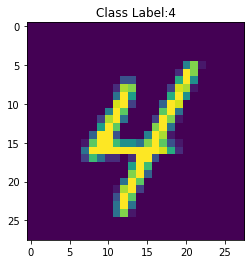

In [32]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

print("images:")
print(images_train)
print("labels:")
print(labels_train)
print("---------------------")

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

#if you want to use only the first 1000 data points.
# images_test = images_test[0:1000,:]
# labels_test = labels_test[0:1000,:]

print("images_train:",images_train.shape)
print("labels_train:",labels_train.shape)
print("images_test:",images_test.shape)
print("labels_test:",labels_test.shape)

#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

## Part B

(b) Write a Matlab or Python function that implements kNN for this task and reports the accuracy for each class (10 numbers) as well as the average accuracy (one number).
[acc acc av] = kNN(images train, labels train, images test, labels test, k)
where acc is a vector of length 10 and acc av is a scalar. Look at a few correct and wrong predictions to see if it makes sense. To speed it up, in all experiments, you may use only the first 1000 testing images.

In [33]:
import numpy as np
import operator 
from operator import itemgetter

def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def predict(imagestrain, labelstrain, imagestest, labelstest, K):
    predictions = []
    for i in range(len(imagestest)):
        dist = np.array([euc_dist(imagestest[i], x_t) for x_t in imagestrain])#distance between the selected test point and all train points
        dist_sorted = dist.argsort()[:K]  #dis_sort = index of label_train  ＃choose Ｋ nearest data
        neigh_count = {}
        for idx in dist_sorted:
            if labelstrain[idx][0] in neigh_count:
                neigh_count[labelstrain[idx][0]] += 1
            else:
                neigh_count[labelstrain[idx][0]] = 1
        sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
        predictions.append(sorted_neigh_count[0][0])
    return(predictions)

In [34]:
images_test_1000 = images_test[0:1000,:]
labels_test_1000 = labels_test[0:1000,:]
pred_1000 = predict(images_train, labels_train, images_test_1000, labels_test_1000, 5)

In [35]:
# Change test_labels from 2D array to 1D array
labels_test_one_array = []
for i in range(0,len(labels_test_1000)):
    labels_test_one_array.append(labels_test[i][0])

# Caculate the average accuracy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
# print("labels_test:",labels_test_one_array)
# print("pred:", pred)
acc_av = accuracy_score(labels_test_one_array, pred_1000)

# Caculate 1 accuracy
# labels_test_one_array v.s pred
all_num = 0
same_num = 0
acc = []
for j in range(0,10):
    all_num = 0
    same_num = 0
    for i in range(0,len(labels_test_one_array)):
        if labels_test_one_array[i] == j:
            all_num = all_num + 1
            if pred_1000 [i] == j:
                same_num = same_num + 1
    if all_num == 0:
        acc.append(-1)
        all_num = -1
    else:
        acc.append(same_num/all_num)
        print(j,"accuracy:",same_num/all_num)
#     print(j,"accuracy:",same_num,all_num,same_num/all_num)
        
print("")
print("acc_av =",acc_av)
print("acc =",acc)


0 accuracy: 1.0
1 accuracy: 1.0
2 accuracy: 0.9191919191919192
3 accuracy: 0.9652173913043478
4 accuracy: 0.9770114942528736
5 accuracy: 0.9893617021276596
6 accuracy: 0.9883720930232558
7 accuracy: 0.9741379310344828
8 accuracy: 0.9278350515463918
9 accuracy: 0.9509803921568627

acc_av = 0.969
acc = [1.0, 1.0, 0.9191919191919192, 0.9652173913043478, 0.9770114942528736, 0.9893617021276596, 0.9883720930232558, 0.9741379310344828, 0.9278350515463918, 0.9509803921568627]


## Part C

(c) For k = 1, change the number of training data points (30 to 10,000) to see the change in perfor- mance. Plot the average accuracy for 10 different dataset sizes. You may use command logspace in Matlab. In the plot, x-axis is for the number of training data and y-axis is for the accuracy.

In [36]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

images_test_1000 = images_test[0:1000,:]
labels_test_1000 = labels_test[0:1000,:]
accuracy = []

size = [30, 50, 100, 500, 1000, 2000, 4000, 6000, 8000, 10000]

for j in size:
    images_train_size = images_train[0:j,:]
    labels_train_size = labels_train[0:j,:]
    pred = predict(images_train_size, labels_train_size, images_test_1000, labels_test_1000, 1)  #K=1
    
    # Change test_labels from 2D array to 1D array
    labels_test_one_array = []
    for i in range(0,len(labels_test_1000)):
        labels_test_one_array.append(labels_test_1000[i][0])
        
    acc_av = accuracy_score(labels_test_one_array, pred)   
    print(j,"acc_av:",acc_av)
    accuracy.append(acc_av)
    
    
    

30 acc_av: 0.607
50 acc_av: 0.639
100 acc_av: 0.723
500 acc_av: 0.842
1000 acc_av: 0.863
2000 acc_av: 0.893
4000 acc_av: 0.925
6000 acc_av: 0.939
8000 acc_av: 0.941
10000 acc_av: 0.953


Text(0, 0.5, 'Accuracy')

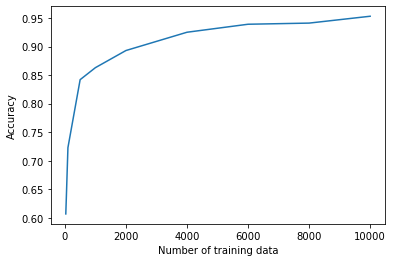

In [37]:
from matplotlib import pyplot as plt
plt.plot(size,accuracy) 
plt.xlabel("Number of training data") 
plt.ylabel("Accuracy")

## Part D

(d) Show the effect of k on the accuracy. Make a plot similar to the above one with multiple colored curves on the top of each other (each for a particular k in [1 2 3 5 10].) You may use command legend in Matlab to name different colors.

k= 1
30 acc_av: 0.607
50 acc_av: 0.639
100 acc_av: 0.723
500 acc_av: 0.842
1000 acc_av: 0.863
2000 acc_av: 0.893
4000 acc_av: 0.925
6000 acc_av: 0.939
8000 acc_av: 0.941
10000 acc_av: 0.953
k= 2
30 acc_av: 0.607
50 acc_av: 0.639
100 acc_av: 0.723
500 acc_av: 0.842
1000 acc_av: 0.863
2000 acc_av: 0.893
4000 acc_av: 0.925
6000 acc_av: 0.939
8000 acc_av: 0.941
10000 acc_av: 0.953
k= 3
30 acc_av: 0.55
50 acc_av: 0.601
100 acc_av: 0.71
500 acc_av: 0.846
1000 acc_av: 0.885
2000 acc_av: 0.904
4000 acc_av: 0.927
6000 acc_av: 0.933
8000 acc_av: 0.948
10000 acc_av: 0.95
k= 5
30 acc_av: 0.484
50 acc_av: 0.554
100 acc_av: 0.69
500 acc_av: 0.852
1000 acc_av: 0.878
2000 acc_av: 0.906
4000 acc_av: 0.932
6000 acc_av: 0.941
8000 acc_av: 0.95
10000 acc_av: 0.95
k= 10
30 acc_av: 0.36
50 acc_av: 0.407
100 acc_av: 0.652
500 acc_av: 0.846
1000 acc_av: 0.877
2000 acc_av: 0.908
4000 acc_av: 0.924
6000 acc_av: 0.932
8000 acc_av: 0.941
10000 acc_av: 0.944


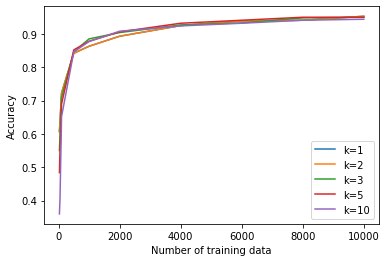

In [38]:
k_array = [1, 2, 3, 5, 10]
size = [30, 50, 100, 500, 1000, 2000, 4000, 6000, 8000, 10000]

for k in k_array:
    accuracy = []
    print("k=",k)
    for j in size:
        images_train_size = images_train[0:j,:]
        labels_train_size = labels_train[0:j,:]
        pred = predict(images_train_size, labels_train_size, images_test_1000, labels_test_1000, k)  #K=1,2,3,5,10

        # Change test_labels from 2D array to 1D array
        labels_test_one_array = []
        for i in range(0,len(labels_test_1000)):
            labels_test_one_array.append(labels_test_1000[i][0])

        acc_av = accuracy_score(labels_test_one_array, pred)   
        print(j,"acc_av:",acc_av)
        accuracy.append(acc_av)
        

    plt.plot(size,accuracy,label="k="+str(k)) 
    plt.xlabel("Number of training data") 
    plt.ylabel("Accuracy")
    plt.legend()
        

## Part E

(e) Choose the best k for 2,000 total training data by splitting the training data into two halves (the first for training and the second for validation). You may plot the average accuracy wrt k for this. Note that in this part, you should not use the test data. You may search for k in this list: [1 2 3 5 10].

k= 1
acc_av: 0.869
k= 2
acc_av: 0.869
k= 3
acc_av: 0.875
k= 5
acc_av: 0.884
k= 10
acc_av: 0.87

Best K = 5
Accuracy = 0.884


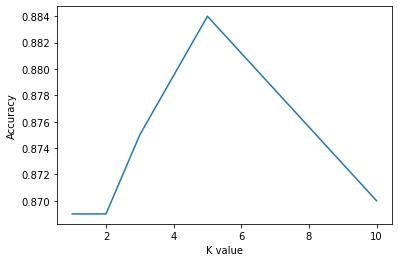

In [39]:
k_list = [1, 2, 3, 5, 10]
images_train_2000 = images_train[0:2000,:]
labels_train_2000 = labels_train[0:2000,:]

images_train_1k = images_train_2000[0:1000,:]
labels_train_1k = labels_train_2000[0:1000,:]
images_test_1k = images_train_2000[1000::,:]
labels_test_1k = labels_train_2000[1000:,:]

accuracy = []

for k in k_list:
    print("k=",k)
    
    pred = predict(images_train_1k, labels_train_1k, images_test_1k, labels_test_1k, k)  #K=1,2,3,5,10

    # Change test_labels from 2D array to 1D array
    labels_test_one_array = []
    for i in range(0,len(labels_test_1k)):
        labels_test_one_array.append(labels_test_1k[i][0])

    acc_av = accuracy_score(labels_test_one_array, pred)   
    print("acc_av:",acc_av)
    accuracy.append(acc_av)

print("")
# print(accuracy)

plt.plot(k_list,accuracy) 
plt.xlabel("K value") 
plt.ylabel("Accuracy")

index = accuracy.index(max(accuracy))
print("Best K =", k_list[index])
print("Accuracy =",accuracy[index])